# KAZNIVA DEJANJA V SLOVENIJI

## 1. Predprocesiranje podatkov

Podatki so zbrani v 10 csv datotekah, pri čemer vsaka predstavlja po eno leto (od 2009 do 2019). Podatke iz teh datotek najprej zberemo en sam DataFrame. Spremenimo tudi nekatere atribute.   
Funkcija *get_df()* se izvaja okoli 20 sekund. 

In [1]:
import pandas as pd

In [2]:
def parse_ura_storitve(series):
    ure = []
    for i, val in series.items():
        ure.append(int(val.split(":")[0]))
    return pd.Series(ure, dtype="int")

def get_df():
    df = None
    df_set = False
    for year in range(2009, 2020):
        df_temp = pd.read_csv("../PR21NCMSTK/data/kd" + str(year) + ".csv",
                              delimiter=";",
                              encoding="windows-1250",
                              low_memory=False,
                              dtype={"DatumStoritve": "string",
                                     "MesecStoritve": "string",
                                     "UraStoritve": "string",})
        df_temp.iloc[:, 0] = df_temp.iloc[:, 0] + year * 1000_000
        df_temp.iloc[:, 2] = parse_ura_storitve(df_temp.iloc[:, 2])
        df_temp.iloc[:, 3] = df_temp.iloc[:, 3].replace(["PONEDELJEK",
                                                         "TOREK",
                                                         "SREDA",
                                                         "ČETRTEK",
                                                         "PETEK",
                                                         "SOBOTA",
                                                         "NEDELJA"], [1, 2, 3, 4, 5, 6, 7]).astype(int)

        df_temp.iloc[:, 5] = df_temp.iloc[:, 5].replace(["DA", "NE"], [1, 0]).astype("bool")
        df_temp.iloc[:, 8] = df_temp.iloc[:, 8].replace(["GOSPODARSKA", "SPLOŠNA"], [1, 0]).astype("bool")
        df_temp.iloc[:, 9] = df_temp.iloc[:, 9].replace(["ORGANIZIRANA", " "], [1, 0]).astype("bool")
        df_temp.iloc[:, 10] = df_temp.iloc[:, 10].replace(["MLADOLETNIŠKA", " "], [1, 0]).astype("bool")
        df_temp.iloc[:, 11] = df_temp.iloc[:, 11].replace(["DA", "NE"], [1, 0]).astype("bool")


        df_temp.columns = ["ZaporednaStevilkaKD",
                          "MesecStoritve",
                          "UraStoritve",
                          "DanVTednu",
                          "PUStoritveKD",
                          "Povratnik",
                          "OpisKD",
                          "PoglavjeKD",
                          "GospodarskiKriminal",
                          "OrganiziranKriminal",
                          "MladoletniskaKriminaliteta",
                          "Poskus",
                          "KriminalisticnaOznacba1",
                          "KriminalisticnaOznacba2",
                          "KriminalisticnaOznacba3",
                          "UporabljenoSredstvo1",
                          "UporabljenoSredstvo2",
                          "UporabljenoSredstvo3",
                          "UporabljenoSredstvo4",
                           "UpravnaEnotaStoritve",
                           "OpisKraja",
                           "LetoZakljucenegaDokumenta",
                           "VrstaZakljucenegaDokumenta",
                           "ZaporednaStevilkaOsebeVKD",
                           "VrstaOsebe",
                           "StarostniRazred",
                           "Spol",
                           "Drzavljanstvo",
                           "Poskodba",
                           "VplivAlkohola",
                           "VplivMamil",
                           "OrganiziranaZdruzba",
                           "Skoda"
                           ]

        if not df_set:
            df = df_temp
            df_set = True
        else:
            df = df.append(df_temp, ignore_index=True)

    return df


df = get_df()
df.iloc[:, 0:4]

,ZaporednaStevilkaKD,MesecStoritve,UraStoritve,DanVTednu
0,2009000001,03.2002,0,5
1,2009000001,03.2002,0,5
2,2009000002,06.2002,15,2
3,2009000003,07.2002,17,4
4,2009000003,07.2002,17,4
...,...,...,...,...
1556134,2019061193,11.2019,23,3
1556135,2019061193,11.2019,23,3
1556136,2019061193,11.2019,23,3
1556137,2019061194,09.2016,0,5


In [19]:
def fill_nan(n):
    df.iloc[:, n] = df.iloc[:, n].fillna("Ni podatka")

def print_atribut(n):
    print("- Vrednosti:")
    print(df.iloc[:, n], end="\n\n")
    print("- Število neznanih vrednosti: ")
    print(df.loc[df.iloc[:, n].isnull()].iloc[:, n].size, end="\n\n")
    print("- Unikatne vrednosti: ")
    print(df.iloc[:, n].unique())

for i in range(33): fill_nan(i)

In [20]:
print_atribut(32)

- Vrednosti:
0                           BREZ
1                100 - 1.000 EUR
2                100 - 1.000 EUR
3                           BREZ
4          100.000 - 500.000 EUR
                   ...          
1556134               DO 100 EUR
1556135               DO 100 EUR
1556136               DO 100 EUR
1556137                     BREZ
1556138                     BREZ
Name: Skoda, Length: 1556139, dtype: object

- Število neznanih vrednosti: 
0

- Unikatne vrednosti: 
['BREZ' '100 - 1.000 EUR' '100.000 - 500.000 EUR' 'DO 100 EUR'
 '1.000 - 10.000 EUR' 'Ni podatka' '10.000 - 100.000 EUR'
 'NAD 500.000 EUR']


#### Novi atributi
*0. ZaporednaStevilkaKD*: 
- Tip: int64. 
- Vrednosti: od 2009000001 do 2019061194. 
- Obrazložitev: Ker se zaporedne številke resetirajo vsako leto, jih spremenimo tako, da se začnejo z letom, ko je bil podatek zapisan v tabelo (npr. ID 61193 iz leta 2019 postane 2019061193). Ni neznanoh vrednosti.

*1. MesecStoritve*: 
-  Tip: string. 
- Primer vrednosti: 03.2002
- Ni neznanih vrednosti. 

*2. UraStoritve*: 
- Tip: int64 
- Vrednosti: 0 - 23
- Ni neznanih vrednosti. 

*3. DanVTednu*: 
- int64 
- Vrednosti: 0 - 7
- Ni neznanih vrednosti. 

*4. PUStoritveKD*: 
- Tip: string 
- Primer vrednosti: "PU LJUBLJANA"
 
*5. Povratnik*: 
- Tip: bool
- Ni neznanih vrednosti. 

*6. OpisKD*: 
- Tip: string
- Primer vrednosti: "KZ12/204*/2/S/ - TATVINA"
- Ni neznanih vrednosti. 

*7. PoglavjeKD*: 
- Tip: object
- Primer vrednosti: "KD ZOPER GOSPODARSTVO"
- Zelo malo neznanih vrednosti
- Neznane vrednosti nastavimo na "unknown"

*8. GospodarskiKriminal*:
- Tip: bool
- Ni neznanih vrednosti
- Obrazložitev: če gre za gospodarski krimal, je vrednost atributa True

*9. OrganiziraniKriminal*:
- Tip: bool
- Ni neznanih vrednosti

*10. MladoletnikaKriminaliteta*: 
- Tip: bool
- Ni neznanih vrednosti

*11. Poskus*: 
- Tip: bool
- Ni neznanih vrednosti

*12. KriminalistinaOznacba1*:
- Tip: object
- Primer vrednosti: "DAVKA NA DODANO VREDNOST - O"
- Neznane vrednosti nastavimo na "unknown"

*13. KriminalisticnaOznacba2*

*14. KriminalisticnaOznacba3*

*15. UporabljenoSredstvo1*:
- Tip: Object
- Primer vrednosti: "152-LISTINE"
- Neznane vrednosti nastavimo na "unknown" 

*16. UporabljenoSredstvo2*

*17. UporabljenoSredstvo3*

*18. UporabljenoSredstvo4*

*19. UpravnaEnotaStoritve*: 
- Tip: Object
- Primer vrednosti: "CELJE"
- Ni neznanih vrednosti

*20. OpisKraja*: 
- Tip: Object

*21. LetoZakljucnegaDokumenta*: 
- Tip: int64
- Vrednosti: 2009 - 2019
- Ni neznanih vrednosti

*22. VrstaZakljucnegaDokumenta*: 
- Tip: Object

*23. ZaporednaStevilkaOsebeVKD*: 
- Tip: float64

*24. VrstaOsebe*: 
- Tip: object

*25. StarostniRazred*: 
- Tip: object

*26. Spol*: 
- Tip: object

*27. Drzavljanstvo*: 
- Tip: object

*28. Poskodba*: 
- Tip: object

*29. VplivAlkohola*: 
- Tip: object

*30. VplivMamil*: 
- Tip: object

*31. OrganiziranaZdruzba*: 
- Tip: object

*32. Skoda*: 
- Tip: object


## 2. Vizualizacija

In [5]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

In [21]:
df2 = df.to_numpy()
df2

array([[2009000001, '03.2002', 0, ..., 'NN', 'NE', 'BREZ'],
       [2009000001, '03.2002', 0, ..., 'NN', 'NE', '100 - 1.000 EUR'],
       [2009000002, '06.2002', 15, ..., 'NN', 'NE', '100 - 1.000 EUR'],
       ...,
       [2019061193, '11.2019', 23, ..., 'NN', 'NE', 'DO 100 EUR'],
       [2019061194, '09.2016', 0, ..., 'NN', 'NE', 'BREZ'],
       [2019061194, '09.2016', 0, ..., 'NN', 'NE', 'BREZ']], dtype=object)

Najprej nas zanima, na kateri dan v tednu se zgodi največ zločinov skozi vsa dokumentirana leta.

In [7]:
pojavitevDnevi = dict()
for i in range(1, 8):
    pojavitevDnevi[i] = 0

for row in df2:
    pojavitevDnevi[row[3]] += 1

print("Število storjenih zločinov na določen dan v tednu:")
for dan in pojavitevDnevi:
    print(dan,":", pojavitevDnevi[dan])

Število storjenih zločinov na določen dan v tednu:
1 : 246792
2 : 235250
3 : 240599
4 : 238423
5 : 250866
6 : 184755
7 : 159454


Text(0.5, 1.0, 'Prikaz števila storjenih zločinov na določen dan v tednu')

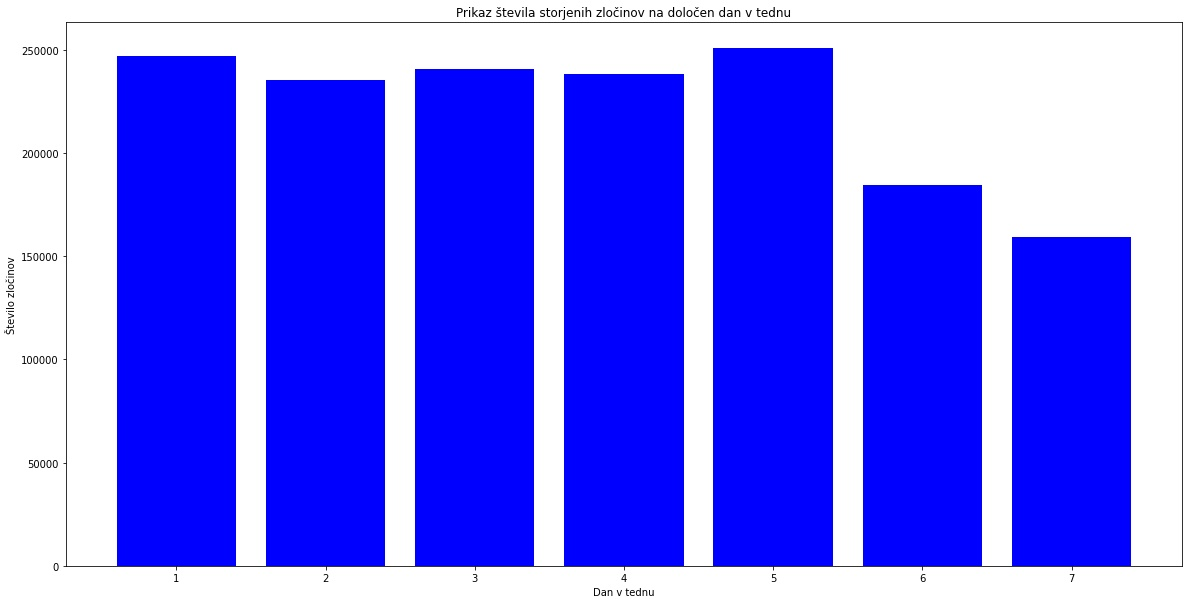

In [8]:
plt.figure(figsize=(20,10))
plt.bar(pojavitevDnevi.keys(), pojavitevDnevi.values(), color='b')
plt.xlabel('Dan v tednu')
plt.ylabel('Število zločinov')
plt.title('Prikaz števila storjenih zločinov na določen dan v tednu')

Iz grafa je razvidno, da je največ zločinov storjenih ob petkih, najmanj pa med vikendom.